In [1]:
#categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med'] categories=categories,
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(18846, 173762)

In [3]:
X_train_counts

<18846x173762 sparse matrix of type '<class 'numpy.int64'>'
	with 2952534 stored elements in Compressed Sparse Row format>

In [4]:
count_vect.vocabulary_.get(u'algorithm')

38333

In [5]:
count_vect.vocabulary_.get(u'sd345')

141089

tf–idf 

In [6]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(18846, 173762)

In [7]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tf, twenty_train.target)

In [8]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf

<18846x173762 sparse matrix of type '<class 'numpy.float64'>'
	with 2952534 stored elements in Compressed Sparse Row format>

In [9]:
docs_new = ['God is love', 'OpenGL on the GPU is fast']
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, twenty_train.target_names[category]))

'God is love' => soc.religion.christian
'OpenGL on the GPU is fast' => comp.graphics


In [10]:
#?все
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Аротем\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
movie_data = load_files(r"C:\Users\Аротем\StarDa\ITMO\Untitled Folder\txt_sentoken")
X, y = movie_data.data, movie_data.target

In [12]:
import nltk
nltk.download('wordnet')

documents = []

from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Аротем\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

In [14]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
y

array([0, 1, 1, ..., 1, 0, 0])

In [18]:
set(movie_data.target)

{0, 1}

In [19]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=1000, random_state=0)

In [20]:
y_pred = classifier.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[180  28]
 [ 30 162]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       208
           1       0.85      0.84      0.85       192

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400

0.855


In [22]:
with open('text_classifier', 'wb') as picklefile:
    pickle.dump(classifier,picklefile)

In [23]:
with open('text_classifier', 'rb') as training_model:
    model = pickle.load(training_model)

In [24]:
from sklearn.linear_model import LogisticRegression
clfLR = LogisticRegression(random_state=0, n_jobs=-1 ).fit(X_train, y_train)
y_pred2 = clfLR.predict(X_test)

In [25]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))
print(accuracy_score(y_test, y_pred2))

[[168  40]
 [ 28 164]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       208
           1       0.80      0.85      0.83       192

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400

0.83


In [26]:
from sklearn.model_selection import GridSearchCV
parameters = {"C":[0.001, 0.01, 0.1, 1, 10]}

clfGS = GridSearchCV(clfLR, parameters, cv=10)
clfGS.fit(X_train, y_train)
y_pred3 = clfGS.best_estimator_.predict(X_test)
clfGS.best_estimator_, clfGS.best_params_, clfGS.best_score_

(LogisticRegression(C=1, n_jobs=-1, random_state=0),
 {'C': 1},
 0.8293750000000001)

In [27]:
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))
print(accuracy_score(y_test, y_pred3))

[[168  40]
 [ 28 164]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       208
           1       0.80      0.85      0.83       192

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400

0.83


In [28]:
from sklearn.tree import DecisionTreeClassifier
clfTree = DecisionTreeClassifier(random_state=0)
clfTree.fit(X_train, y_train)
y_pred4 = clfTree.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(classification_report(y_test,y_pred4))
print(accuracy_score(y_test, y_pred4))

[[121  87]
 [ 72 120]]
              precision    recall  f1-score   support

           0       0.63      0.58      0.60       208
           1       0.58      0.62      0.60       192

    accuracy                           0.60       400
   macro avg       0.60      0.60      0.60       400
weighted avg       0.60      0.60      0.60       400

0.6025


In [29]:
parametersTree = {"criterion":["gini", "entropy"], 'max_depth':[2,5,10,20,50,100]}
clfGS2 = GridSearchCV(clfTree, parametersTree, cv=10)
clfGS2.fit(X_train, y_train)
y_pred5 = clfGS.best_estimator_.predict(X_test)

In [30]:
clfGS2.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

In [31]:
print(confusion_matrix(y_test,y_pred5))
print(classification_report(y_test,y_pred5))
print(accuracy_score(y_test, y_pred5))

[[168  40]
 [ 28 164]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       208
           1       0.80      0.85      0.83       192

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400

0.83


In [32]:
##6
from sklearn.neighbors import KNeighborsClassifier
clfKN = KNeighborsClassifier()
parameters = {"n_neighbors":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]}

clfGS2 = GridSearchCV(clfKN, parameters, cv=10)
clfGS2.fit(X_train, y_train)
y_pred6 = clfGS2.best_estimator_.predict(X_test)
clfGS2.best_estimator_, clfGS2.best_params_, clfGS2.best_score_

(KNeighborsClassifier(n_neighbors=25), {'n_neighbors': 25}, 0.724375)

In [33]:
print(confusion_matrix(y_test,y_pred6))
print(classification_report(y_test,y_pred6))
print(accuracy_score(y_test, y_pred6))

[[132  76]
 [ 51 141]]
              precision    recall  f1-score   support

           0       0.72      0.63      0.68       208
           1       0.65      0.73      0.69       192

    accuracy                           0.68       400
   macro avg       0.69      0.68      0.68       400
weighted avg       0.69      0.68      0.68       400

0.6825


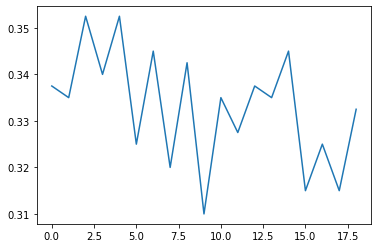

In [34]:
import matplotlib.pyplot as plt
error_rates = []
for i in np.arange(1, 20):
    new_model = KNeighborsClassifier(n_neighbors = i)
    new_model.fit(X_train, y_train)
    new_predictions = new_model.predict(X_test)
    error_rates.append(np.mean(new_predictions != y_test))
plt.plot(error_rates)


# Нейросети

In [ ]:
pip install tensorflow

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, Dropout, LSTM, GRU
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Максимальное количество слов 
num_words = 10000
# Максимальная длина новости
max_news_len = 1000
# Количество классов новостей
nb_classes = 20

In [37]:
twenty_train = fetch_20newsgroups(subset='train', shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', shuffle=True, random_state=42)

y_train = utils.to_categorical(twenty_train.target - 1, nb_classes)
y_test = utils.to_categorical(twenty_test.target - 1, nb_classes)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [38]:
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(twenty_train.data)
#tokenizer.word_index

In [39]:
sequences = tokenizer.texts_to_sequences(twenty_train.data)
index = 1
#print(news[index])
#print(sequences[index])

In [40]:
x_train = pad_sequences(sequences, maxlen=max_news_len)
x_train[:5]

array([[   0,    0,    0, ...,   35,   58, 7860],
       [   0,    0,    0, ...,  118,  441,   15],
       [   0,    0,    0, ..., 2676,  187,   84],
       [   0,    0,    0, ...,    3, 5132, 2708],
       [   0,    0,    0, ...,  207, 2805, 2708]])

## Сверточная нейронная сеть

In [41]:
model_cnn = Sequential()
model_cnn.add(Embedding(num_words, 32, input_length=max_news_len))
model_cnn.add(Conv1D(250, 5, padding='valid', activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(20, activation='softmax'))

In [42]:
model_cnn.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [43]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 32)          320000    
_________________________________________________________________
conv1d (Conv1D)              (None, 996, 250)          40250     
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               32128     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                2580      
Total params: 394,958
Trainable params: 394,958
Non-trainable params: 0
_________________________________________________________________


In [44]:
model_cnn_save_path = 'best_model_cnn.h5'
checkpoint_callback_cnn = ModelCheckpoint(model_cnn_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [45]:
history_cnn = model_cnn.fit(x_train, 
                            y_train, 
                            epochs=5,
                            batch_size=128,
                            validation_split=0.1,
                            callbacks=[checkpoint_callback_cnn])

Epoch 1/5
80/80 [==============================] - 69s 825ms/step - loss: 2.9723 - accuracy: 0.0931 - val_loss: 2.8827 - val_accuracy: 0.2624

Epoch 00001: val_accuracy improved from -inf to 0.26237, saving model to best_model_cnn.h5
Epoch 2/5
80/80 [==============================] - 68s 851ms/step - loss: 2.1606 - accuracy: 0.4388 - val_loss: 1.3712 - val_accuracy: 0.5936

Epoch 00002: val_accuracy improved from 0.26237 to 0.59364, saving model to best_model_cnn.h5
Epoch 3/5
80/80 [==============================] - 68s 848ms/step - loss: 0.9131 - accuracy: 0.7499 - val_loss: 0.7501 - val_accuracy: 0.7915

Epoch 00003: val_accuracy improved from 0.59364 to 0.79152, saving model to best_model_cnn.h5
Epoch 4/5
80/80 [==============================] - 66s 822ms/step - loss: 0.4418 - accuracy: 0.8862 - val_loss: 0.5633 - val_accuracy: 0.8357

Epoch 00004: val_accuracy improved from 0.79152 to 0.83569, saving model to best_model_cnn.h5
Epoch 5/5
80/80 [==============================] - 67s 

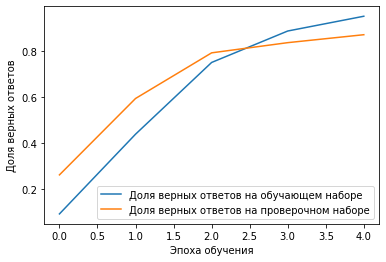

In [46]:
plt.plot(history_cnn.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_cnn.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [47]:
test_sequences = tokenizer.texts_to_sequences(twenty_test.data)
x_test = pad_sequences(test_sequences, maxlen=max_news_len)
x_test

array([[   0,    0,    0, ...,    2,  518, 4456],
       [   0,    0,    0, ..., 2154, 8035,  220],
       [   0,    0,    0, ...,  485,  376, 2863],
       ...,
       [   0,    0,    0, ...,   19, 1370,   15],
       [   0,    0,    0, ...,   63,   37,  892],
       [   0,    0,    0, ...,  125, 1441, 2249]])

In [48]:
model_cnn.load_weights(model_cnn_save_path)

In [49]:
model_cnn.evaluate(x_test, y_test, verbose=1)

236/236 [==============================] - 10s 42ms/step - loss: 0.8361 - accuracy: 0.7732


[0.8360984921455383, 0.7732341885566711]